# Análise exploratória de dados

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
dados = pd.read_csv('../data/raw/data.csv')

## 1. Descrição dos dados

In [2]:
dados

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
# Quantidade de nulos
dados.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
# Tipos dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
dados.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [43]:
index_to_drop = dados['body_mass_g'].idxmax()
index_to_drop

237

In [44]:
# Removendo a linha correspondente ao valor máximo
dados = dados.drop(index_to_drop)

## 2. Perguntas de partida e hipóteses

* Existe relação entre massa corporal e comprimento da nadadeira?

* Distribuição de espécies por ilha

* Existe uma correlação positiva entre o comprimento e a profundidade do bico nas espécies?

* Machos e fêmeas têm massa corporal média diferente



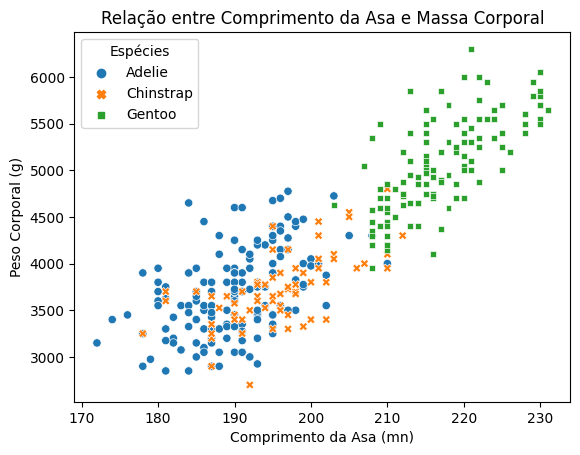

In [5]:
sns.scatterplot(data = dados, x = 'flipper_length_mm', y = 'body_mass_g', hue = 'species', style = 'species')

plt.title("Relação entre Comprimento da Asa e Massa Corporal")
plt.xlabel("Comprimento da Asa (mn)")
plt.ylabel("Peso Corporal (g)")
plt.legend(title = 'Espécies')
plt.show()

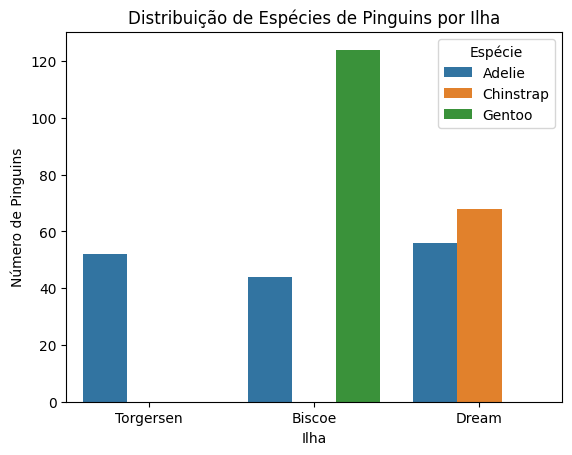

In [40]:
sns.countplot(data = dados, x = 'island', hue = 'species')
plt.title('Distribuição de Espécies de Pinguins por Ilha')
plt.xlabel('Ilha')
plt.ylabel('Número de Pinguins')
plt.legend(title = 'Espécie')
plt.show()

In [59]:
dados.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Coeficiente de Correlação entre comprimento do bico e massa corporal: -0.24





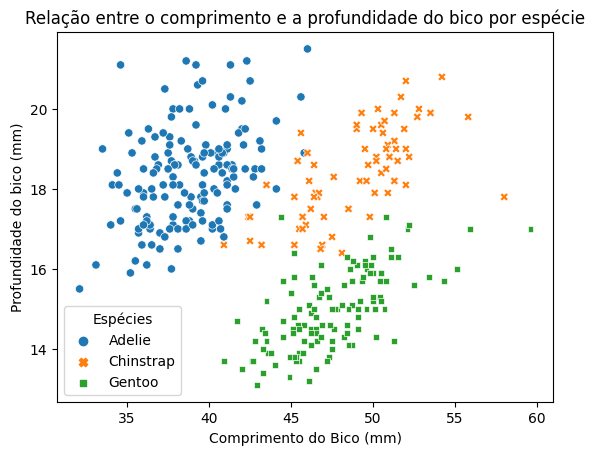

In [53]:
correlation = dados['bill_length_mm'].corr(dados['bill_depth_mm'])
print(f'Coeficiente de Correlação entre comprimento do bico e massa corporal: {correlation:.2f}')

print('\n\n')
sns.scatterplot(data = dados, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species', style = 'species')
plt.title("Relação entre o comprimento e a profundidade do bico por espécie")
plt.xlabel("Comprimento do Bico (mm)")
plt.ylabel("Profundidade do bico (mm)")
plt.legend(title = 'Espécies')
plt.show()


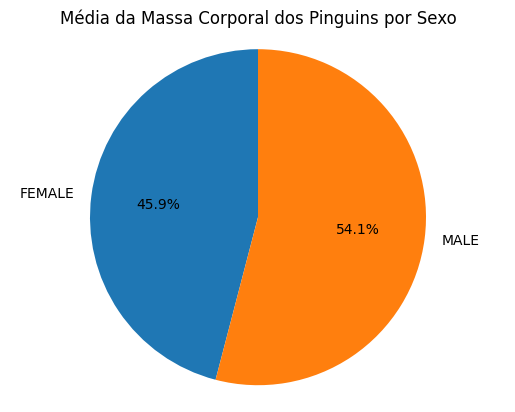

In [57]:
media_corporal_sexo = dados.groupby('sex')['body_mass_g'].mean()
plt.pie(media_corporal_sexo, labels=media_corporal_sexo.index, autopct='%1.1f%%', startangle=90)
plt.title('Média da Massa Corporal dos Pinguins por Sexo')
plt.axis('equal')  
plt.show()

## 3. Insights

## Existe relação entre massa corporal e comprimento da nadadeira?
De forma geral, o gráfico indica uma relação positiva entre o comprimento da asa e a massa corporal. Isso significa que, à medida que o comprimento da asa aumenta, a massa corporal também tende a aumentar. Essa relação é esperada, pois asas maiores geralmente estão associadas a aves maiores e mais pesadas.

### Distribuição de espécies por ilha
Dominância da espécie Gentoo na Ilha Biscoe: A espécie Gentoo apresenta uma população significativamente maior na Ilha Biscoe em comparação com as outras ilhas e espécies. Isso sugere que a Ilha Biscoe oferece condições ambientais particularmente favoráveis para a reprodução e sobrevivência dos pinguins Gentoo. 

Pinguim Gentoo: A tendência de apresentar os maiores valores tanto de comprimento de asa quanto de massa corporal sugere que, em média, essa espécie é a maior das três

### Existe uma correlação positiva entre o comprimento e a profundidade do bico nas espécies?

Apesar da clara separação entre as espécies, existe uma certa sobreposição entre os grupos. Isso significa que há variação no tamanho e forma do bico dentro de cada espécie, o que pode ser influenciado por fatores como idade, sexo e condições ambientais.

Adaptações Alimentares: A forma do bico está diretamente relacionada à dieta de cada espécie. Bicos mais longos e profundos podem ser adaptados para capturar presas maiores e mais profundas, enquanto bicos mais curtos e menos profundos podem ser mais eficientes para capturar presas menores e mais próximas da superfície.

### Machos e fêmeas têm massa corporal média diferente

O gráfico evidencia um dimorfismo sexual acentuado na espécie de pinguim analisada. Os machos, em média, apresentam uma massa corporal significativamente maior do que as fêmeas.
A diferença de tamanho pode ser resultado da seleção sexual, onde as fêmeas preferem acasalar com machos maiores, o que, ao longo do tempo, leva ao aumento do tamanho médio dos machos.



### Conclusão 

Em resumo, a análise dos dados revelou diferenças significativas entre as espécies de pinguins em relação ao tamanho do corpo, forma do bico e distribuição geográfica. Esses resultados sugerem que as características morfológicas dos pinguins estão adaptadas às diferentes condições ambientais e aos nichos ecológicos ocupados por cada espécie. No entanto, são necessárias pesquisas adicionais para compreender completamente os mecanismos evolutivos que levaram a essas diferenças.
